In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, make_s_curve

# PCA on Breast Cancer Data

In [79]:
# Load breast cancer data
cancer_data = load_breast_cancer()
X, Y = cancer_data.data, cancer_data.target

# Reduce dimensionality with PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X) 

# NumPy SVD Implementation of PCA
X_centered = X - np.mean(X, axis=0)
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
X_reduced_svd = X_centered @ Vt.T[:, :2]

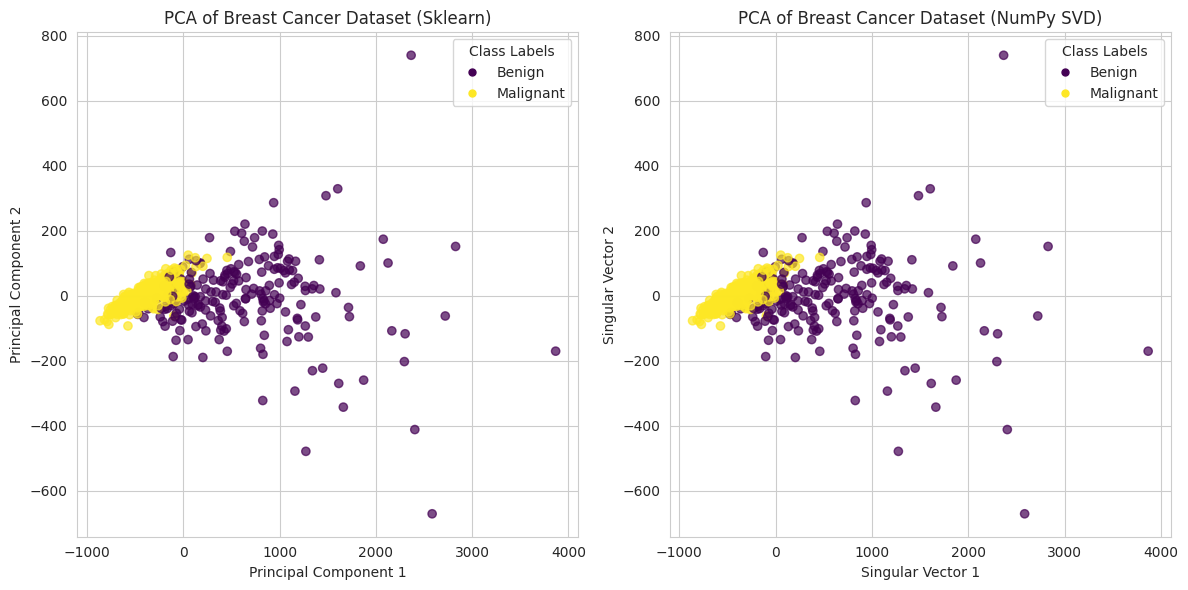

In [85]:
# Create figure
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Plot PCA results
plt.subplot(1, 2, 1)
scatter_pca = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.title('PCA of Breast Cancer Dataset (Sklearn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(0.0), markersize=5, linestyle='None', label='Benign'),
                    plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(1.0), markersize=5, linestyle='None', label='Malignant')],
           title='Class Labels')

# Plot SVD results
plt.subplot(1, 2, 2)
scatter_svd = plt.scatter(-X_reduced_svd[:, 0], X_reduced_svd[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.title('PCA of Breast Cancer Dataset (NumPy SVD)')
plt.xlabel('Singular Vector 1')
plt.ylabel('Singular Vector 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(0.0), markersize=5, linestyle='None', label='Benign'),
                    plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(1.0), markersize=5, linestyle='None', label='Malignant')],
           title='Class Labels')

plt.tight_layout()
plt.show()

# PCA on S Curve Data

In [59]:
# Load S-curve dataset
N_POINTS = 2000
X, color = make_s_curve(N_POINTS, random_state=0)

# Reduce dimensionality with PCA
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X) 

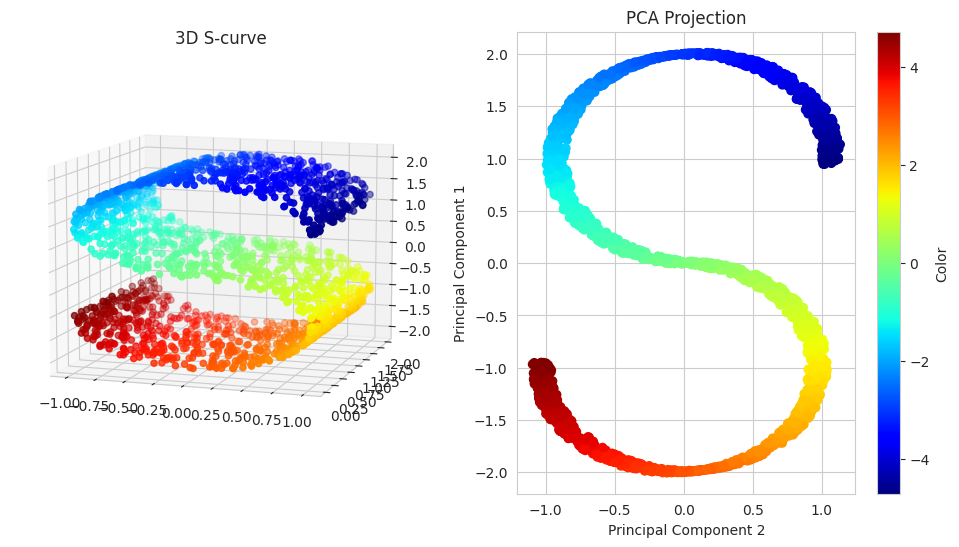

In [60]:
# Create figure
fig = plt.figure(figsize=(12, 6))
# Plot 3D S-curve
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(10, -72)
ax.set_title('3D S-curve')
# Plot 2D PCA projection
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(X_reduced[:, 1], X_reduced[:, 0], c=color, cmap=plt.cm.jet)
ax2.set_xlabel('Principal Component 2')
ax2.set_ylabel('Principal Component 1')
ax2.set_title('PCA Projection')
plt.colorbar(scatter, ax=ax2, label='Color')
plt.show()

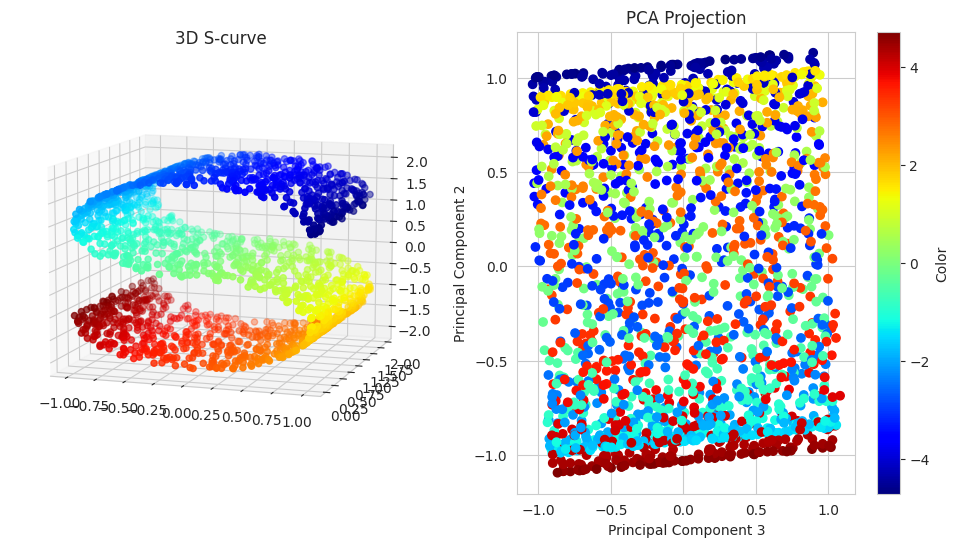

In [61]:
# Create figure
fig = plt.figure(figsize=(12, 6))
# Plot 3D S-curve
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.jet)
ax.view_init(10, -72)
ax.set_title('3D S-curve')
# Plot 2D PCA projection
ax2 = fig.add_subplot(122)
scatter = ax2.scatter(X_reduced[:, 2], X_reduced[:, 1], c=color, cmap=plt.cm.jet)
ax2.set_xlabel('Principal Component 3')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('PCA Projection')
plt.colorbar(scatter, ax=ax2, label='Color')
plt.show()